In [57]:
import pandas as pd
import datetime
import matplotlib.dates as mdates

# load URLs
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

# read csvs
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)

In [ ]:
# verify successful read
print(confirmed_cases)

In [47]:
# choose cities of interest
cities = ['Cheyenne']
state = ['Colorado']
confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for city, st in zip(cities, state):
    new_df_confirmed = confirmed_cases[(confirmed_cases['Admin2'] == city) & (confirmed_cases['Province_State'] == st)]
    confirmed_dict[city] = new_df_confirmed


The following code makes plots for total confirmed cases and deaths over time in Churchill.

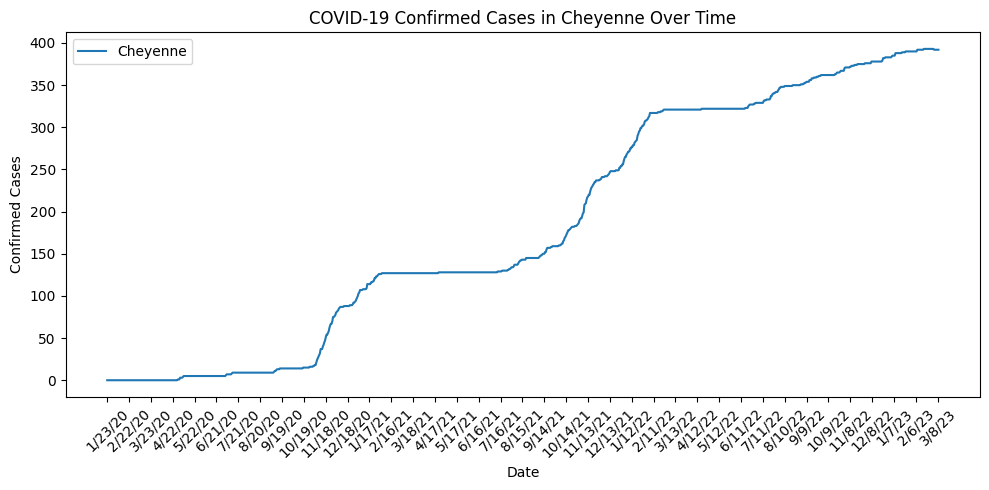

In [51]:
import matplotlib.pyplot as plt

# loving_death_df = deaths_dict['Sierra']
# date_cols_deaths = loving_death_df.columns[12:]
# cases = loving_death_df.iloc[0]

# # Only select the date columns for plotting
# death_dates = date_cols_deaths
# deaths = cases[date_cols_deaths].astype(float)

# plt.figure(figsize=(10, 5))
# plt.plot(death_dates, deaths, label='Sierra')
# plt.xlabel('Date')
# plt.ylabel('Deaths')
# plt.title('COVID-19 Deaths in Sierra County Over Time')
# tick_locs = range(0, len(death_dates), 30)
# tick_labels = death_dates[tick_locs]
# plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
# plt.legend()
# plt.tight_layout()

# plt.show()

cheyenne_confirmed_df = confirmed_dict['Cheyenne']
date_cols = cheyenne_confirmed_df.columns[12:]
confirmed_cases_cheyenne = cheyenne_confirmed_df.iloc[0]

# Only select the date columns for plotting
confirmed_dates = date_cols
confirmed_cases_cheyenne = confirmed_cases_cheyenne[date_cols].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(confirmed_dates, confirmed_cases_cheyenne, label='Cheyenne')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in Cheyenne Over Time')
tick_locs = range(0, len(confirmed_dates), 30)
tick_labels = confirmed_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Code for plotting fraction of population infected over time in Churchill.

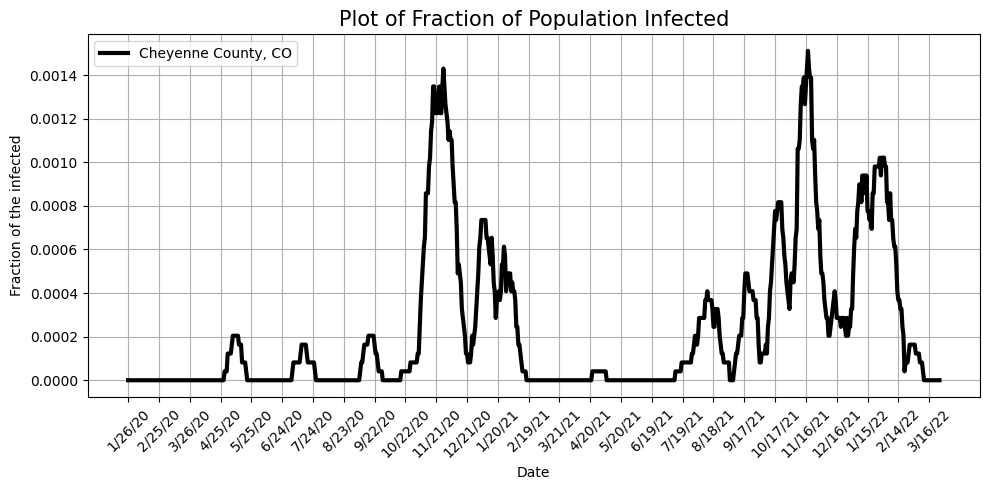

In [54]:
population = 1749
num_days = 100

# Find the indices for the desired date range
start_date = '1/26/20'
end_date = '3/26/22'
date_range = confirmed_cases_cheyenne.index
start_idx = date_range.get_loc(start_date)
end_idx = date_range.get_loc(end_date) + 1  # +1 to include the end date

# Compute the 14-day rolling mean of new cases per population for the selected range
fraction_infected = confirmed_cases_cheyenne.diff().rolling(14, min_periods=1).mean() / population

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(date_range[start_idx:end_idx], fraction_infected.iloc[start_idx:end_idx], label="Cheyenne County, CO", color="k", linewidth=3)
plt.legend(loc='best')
tick_locs = range(0, len(date_range[start_idx:end_idx]), 30)
tick_labels = date_range[start_idx:end_idx][tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('Fraction of the infected')
plt.title('Plot of Fraction of Population Infected', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()


We now restrict data to counties with population ~10k

In [15]:
# choose cities of interest
cities = ['Bullock', 'Coosa', 'Lowndes', 'Wilcox']
populations = [10357, 10387, 10311, 10600]

confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for index, city in enumerate(cities):
    new_df_confirmed = confirmed_cases[confirmed_cases['Admin2']==city]
    confirmed_dict[city] = new_df_confirmed
    new_df_deaths = deaths[deaths['Admin2']==city]
    deaths_dict[city] = new_df_deaths
    print(confirmed_dict)
    confirmed_dict[city]['Population'] = populations[index]
    deaths_dict[city]['Population'] = populations[index]
    

{'Bullock':         UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001011   US  USA    840  1011.0  Bullock        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
5  32.100305 -85.712655  ...    3020    3025    3025    3025    3025    3025   

   3/6/23  3/7/23  3/8/23  3/9/23  
5    3025    3025    3030    3030  

[1 rows x 1154 columns]}
{'Bullock':         UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001011   US  USA    840  1011.0  Bullock        Alabama             US   

         Lat      Long_  ... 3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  \
5  32.100305 -85.712655  ...   3025    3025    3025    3025    3025    3025   

   3/7/23  3/8/23  3/9/23  Population  
5    3025    3030    3030       10357  

[1 rows x 1155 columns], 'Coosa':          UID iso2 iso3  code3    FIPS Admin2 Province_State Country_Region  \
18  84001037   US  USA    840  1037.0  Coosa   

C:\Users\amyyy\AppData\Local\Temp\ipykernel_26804\1794269952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_dict[city]['Population'] = populations[index]
C:\Users\amyyy\AppData\Local\Temp\ipykernel_26804\1794269952.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_dict[city]['Population'] = populations[index]
C:\Users\amyyy\AppData\Local\Temp\ipykernel_26804\1794269952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
print(confirmed_dict)

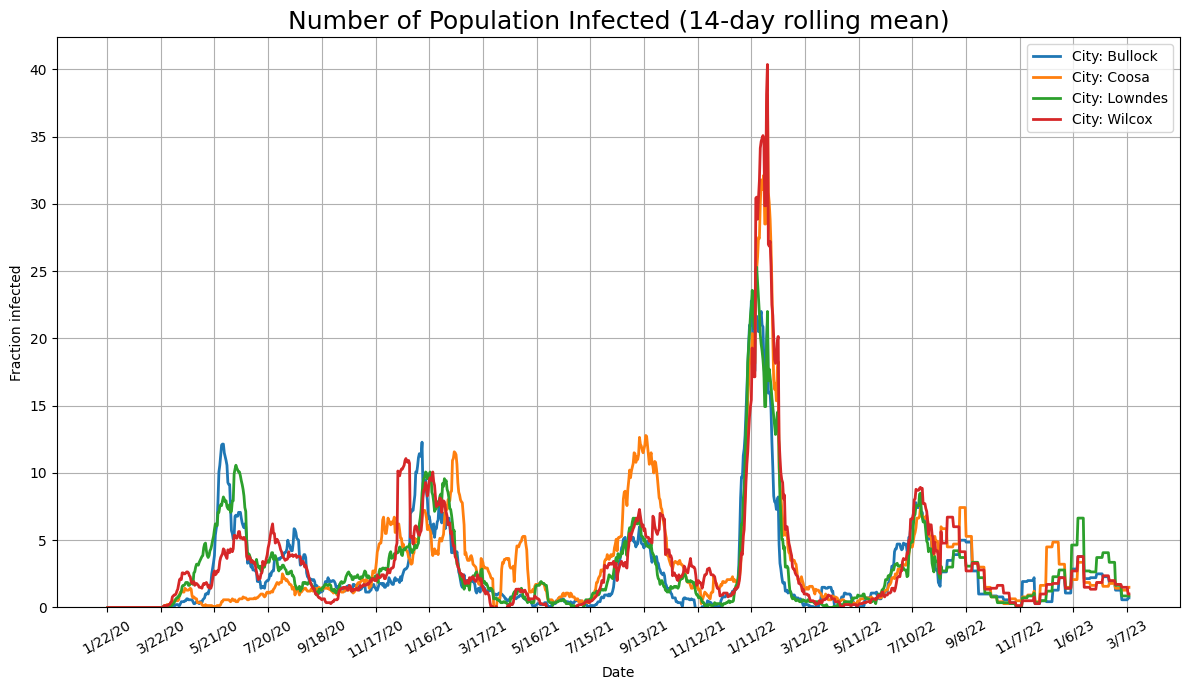

In [20]:
import matplotlib.pyplot as plt
max_fraction = 0
fractions = []
for idx, city in enumerate(cities):
    # Select the row in confirmed_cases where Admin2 matches the city name
    city_df = confirmed_cases[confirmed_cases['Admin2'] == city]
    population = populations[idx]
    # Find the date columns (skip non-date columns)
    date_cols = city_df.columns[city_df.columns.get_loc('Combined_Key')+1:]
    # Use only the first row for each city (in case of duplicates)
    if not city_df.empty:
        series = city_df.iloc[0][date_cols].astype(float)
        fraction = series.diff().rolling(14, min_periods=1).mean()
        fractions.append(fraction)
        max_fraction = max(max_fraction, fraction.max())
    else:
        # If city not found, append zeros
        fractions.append(pd.Series([0]*len(date_cols), index=date_cols))

plt.figure(figsize=(12, 7))
for idx, city in enumerate(cities):
    plt.plot(date_cols, fractions[idx], label=f"City: {city}", linewidth=2)
plt.title('Number of Population Infected (14-day rolling mean)', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Fraction infected')
plt.ylim(0, max_fraction * 1.05)
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(0, len(date_cols), 60), labels=date_cols[::60], rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Get cumulative cases for the county 
# Restrict to the date range between start_date and end_date
cases = confirmed_cases
# Find the first 14 days after 10th case within this range
start_idx = np.argmax(cases > 10)
end_idx = start_idx + 14
y = cases[start_idx:end_idx]
x = np.arange(len(y)).reshape(-1, 1)

# Take log (avoid log(0) by filtering zeros)
mask = y > 0
y_log = np.log(y[mask])
x_log = x[mask]

# Linear regression
reg = LinearRegression().fit(x_log, y_log)
r = reg.coef_[0]

print(f"Estimated exponential growth rate r: {r:.3f}")

# Estimate R0 (assume infectious period D=5 days)
D = 5
R0 = 1 + r * 14

gamma = 1 / 14
beta = R0 * gamma

print(f"Estimated R0: {R0:.2f}")
print(f"Estimated beta: {beta:.4f}")
print(f"Estimated gamma: {gamma:.4f}")

TypeError: '>' not supported between instances of 'str' and 'int'